In [2]:
import pymatgen as pmg
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.core.periodic_table import Element
from matplotlib.pyplot import figure

In [ ]:
import matplotlib.pyplot as pyplot
from scipy.integrate import trapz, simps

def integrate(axis, start, end):
    """Integrates the given DoS data"""
    d_line = axis.get_lines()[1]
    x = d_line.get_xdata()[start:end]
    y = d_line.get_ydata()[start:end]
    pyplot.plot(x,y)
    return(simps(y,x))

/home/kdmiller/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:904: UserWarning: No POTCAR file with matching TITEL fields was found in /home/kdmiller/Projects/trirutiles-study/carrier_doping/elec_dos
  " was found in {}".format(os.path.abspath(p)))


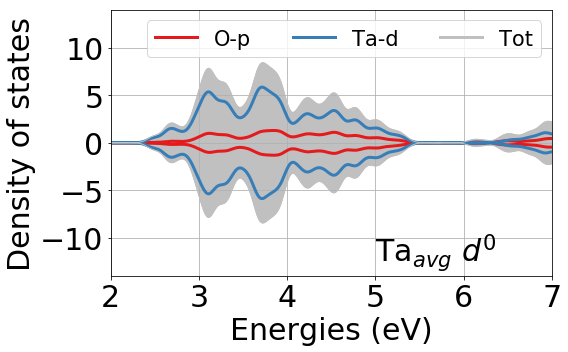

/home/kdmiller/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:904: UserWarning: No POTCAR file with matching TITEL fields was found in /home/kdmiller/Projects/trirutiles-study/carrier_doping/elec_dos
  " was found in {}".format(os.path.abspath(p)))


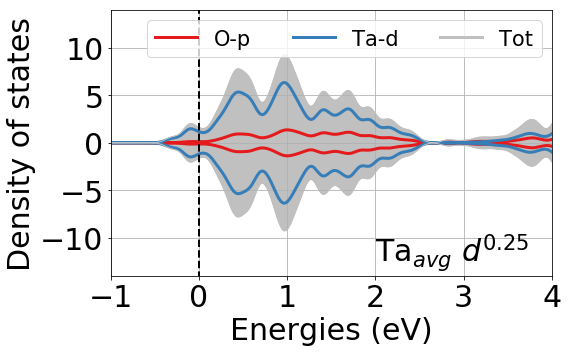

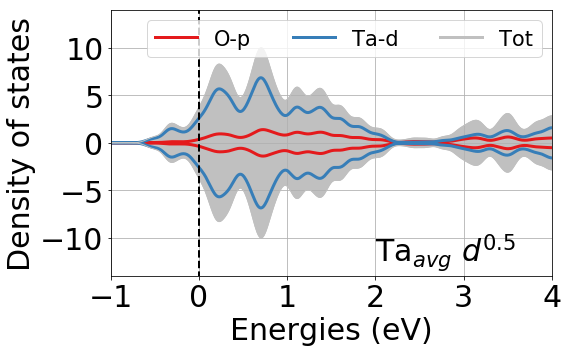

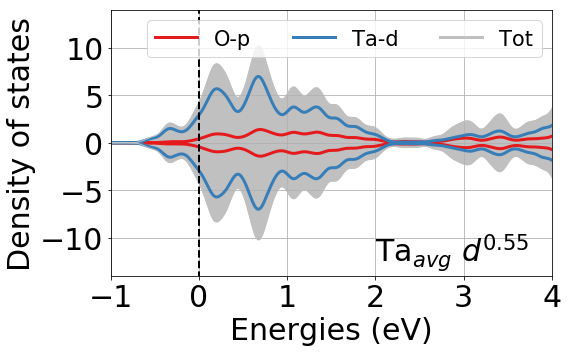

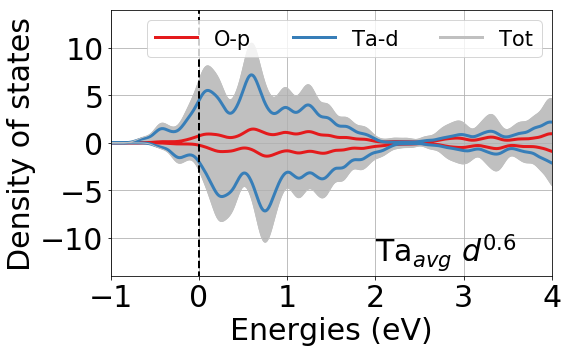

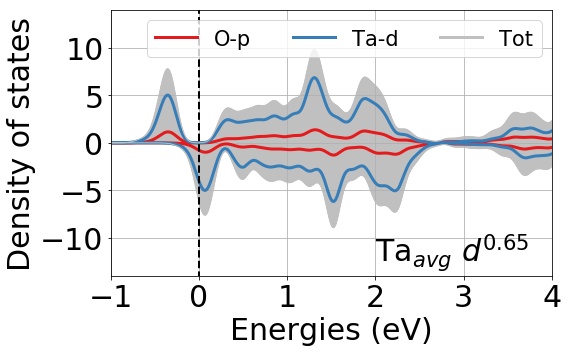

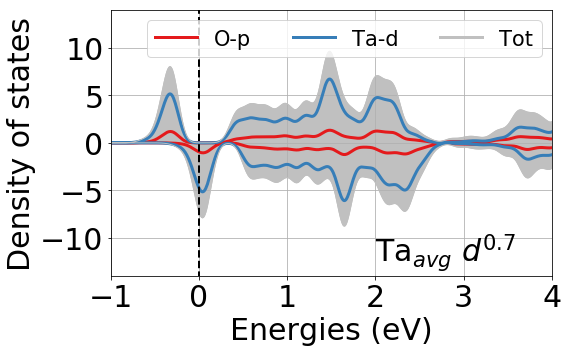

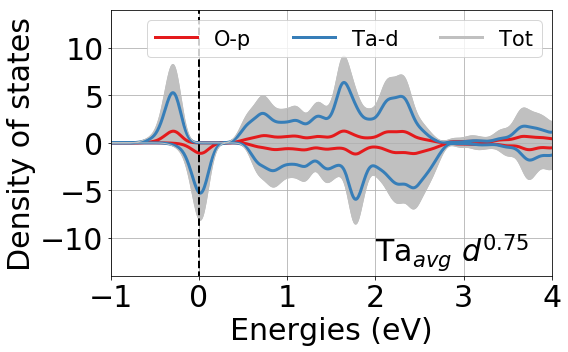

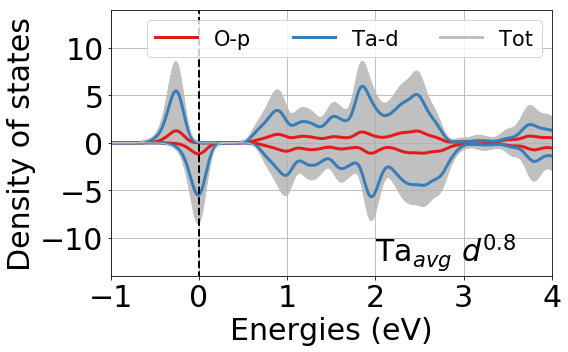

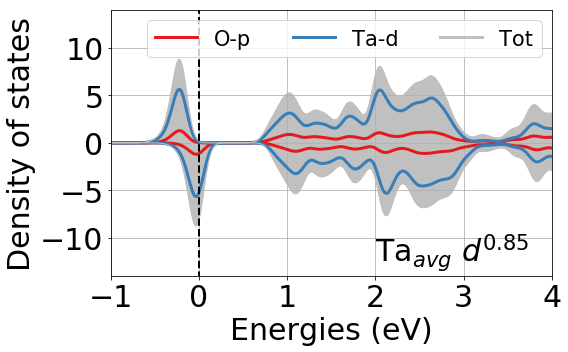

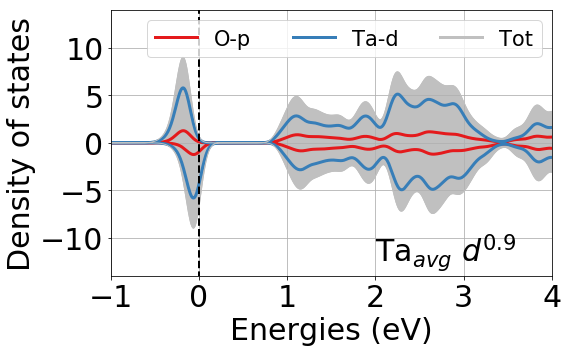

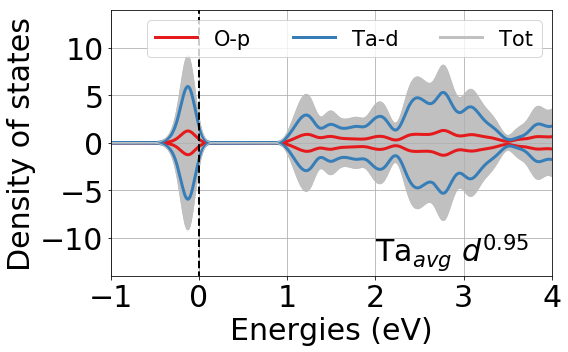

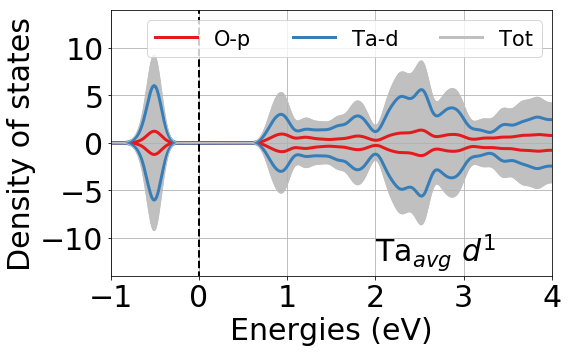

In [3]:
WIDTH = 8
HEIGHT = 5
ELEMENTS = ["Ta", "O"]
PREFIX = "../../elec_dos/vasprun"
SUFFIX = ".xml"
ITERS_1 = ["d0", "d025", "d05", "d055", "d06", "d065", "d07", "d075", "d08", "d085", "d09", "d095", "d1"]
DOPING_LABELS = ['$d^{0}$','$d^{0.25}$','$d^{0.5}$','$d^{0.55}$','$d^{0.6}$','$d^{0.65}$','$d^{0.7}$',
                 '$d^{0.75}$','$d^{0.8}$','$d^{0.85}$','$d^{0.9}$','$d^{0.95}$','$d^{1}$']
XLIMS = [[2,7]] + [[-1,4]]*12
LABEL_FONT = 30

axes = []

for i, iter_1 in enumerate(ITERS_1):
        
    # Extract dos from vasprun
    vr = Vasprun(PREFIX +'-'+ iter_1 + SUFFIX)
    cdos = vr.complete_dos
    tdos = vr.tdos
    elem_doss = cdos.get_element_dos()
    dplt = DosPlotter()

    # Add total dos
    dplt.add_dos("tot", tdos)

    # Add dos for each element
    for elem in ELEMENTS:
        dplt.add_dos(elem, elem_doss[Element(elem)])

    # Customize plot
    dos_plot = dplt.get_plot()
    dos_plot.xlim(XLIMS[i])
    dos_plot.ylim(-14,14)
    dos_plot.grid(1)

        # Make total line grey and filled in
    totLine = dos_plot.gca().get_lines()[2]
    totLine.set_color('silver')

    dos_plot.legend(["O-p", "Ta-d", "Tot"],loc='upper right', ncol=3, fontsize=21) #keep line thick in legend

    totLine.set_linewidth(1)   

    totX = totLine.get_xdata()
    totY = totLine.get_ydata()

    dos_plot.fill_between(totX, totY, where=totY>=-totY, interpolate=True, color='silver')
    dos_plot.fill_between(totX, totY, where=totY<=-totY, interpolate=True, color='silver')


        # Add a U, doping label to bottom right
    dos_plot.text(XLIMS[i][1]-2, -12.5, f"Ta$_{{avg}}$ {DOPING_LABELS[i]}", fontsize=LABEL_FONT)

        # Chance font size
    dos_plot.gca().xaxis.label.set_fontsize(LABEL_FONT)
    dos_plot.gca().yaxis.label.set_fontsize(LABEL_FONT)
#         dos_plot.gca().get_xticklabels().set_fontsize(LABEL_FONT)
#         dos_plot.gca().get_yticklabels().set_fontsize(LABEL_FONT)

        # Add axes to persistent list
    axes.append(dos_plot.gca())


        # Resize/reshape
    fig = dos_plot.gcf()
    fig.set_size_inches(WIDTH,HEIGHT)

    # Show and save
    dos_plot.tight_layout()
    dos_plot.show()
    fig.savefig(f"elec_dos-{iter_1}", img_format="png", dpi=300)
    fig.savefig(f"elec_dos-vec-{iter_1}.pdf", img_format="pdf")



d1 - 1.3004173492265307
d065 - 1.280259428890224


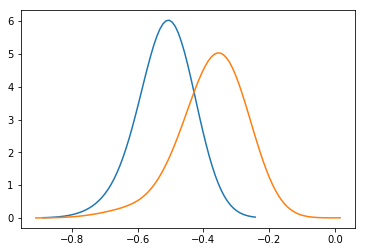

In [55]:
start = 1150
end = 1220

print(f'd1 - {integrate(axes[-1], start, end)}')
print(f'd065 - {integrate(axes[5], 1250, 1350)}')


In [15]:
6002-4900

1102